On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

Q1a: Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

A1a: The naive calculation looked at the average order_amount of the sneakers across all 100 sneakers. However, as shown in the summary statistics there is an outlier (but we can't quite tell which one, as we haven't looked at individual shop prices for shoes). In addition, the average does not take into account the number of units sold for the order_amount, the naive calculation is misleading. To address this, we can use the standard average order value formula of: $$\frac{\text{total revenue}}{\text{number of items sold}}$$ With this formula, we arrive at: $$\text{AOV = }\$357.92$$

In [51]:
# imports
try:
    import pandas as pd
except:
    print ("******************************************************************************************* \n")
    print ("*** NO pandas Library Found, please install it.                                         *** \n")
    print ("******************************************************************************************* \n")

try:
    from matplotlib import pyplot as plt
except:
    print ("******************************************************************************************* \n")
    print ("*** NO matplotlib Library Found, please install it.                                     *** \n")
    print ("******************************************************************************************* \n")

try:
    import numpy as np
except:
    print ("******************************************************************************************* \n")
    print ("*** NO numpy Library Found, please install it.                                          *** \n")
    print ("******************************************************************************************* \n")

try:
    from scipy import stats
except:
    print ("******************************************************************************************* \n")
    print ("*** NO scipy Library Found, please install it.                                          *** \n")
    print ("******************************************************************************************* \n")

In [24]:
# read in data
df_sneakers = pd.read_csv("shopify_challenge_ds.csv")
df_sneakers.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


Column types of sneaker dataset: 
 order_id           int64
shop_id            int64
user_id            int64
order_amount       int64
total_items        int64
payment_method    object
created_at        object
dtype: object
Null characters in sneakers:  False
Summary Stats of the outliers seen visually: 
         order_amount  total_items
count    5000.000000   5000.00000
mean     3145.128000      8.78720
std     41282.539349    116.32032
min        90.000000      1.00000
25%       163.000000      1.00000
50%       284.000000      2.00000
75%       390.000000      3.00000
max    704000.000000   2000.00000


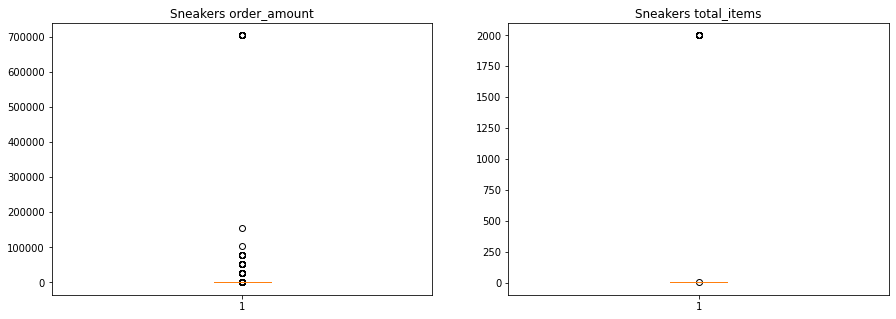

In [48]:
# check data for types, missing values, and outliers
sneaker_col_types = df_sneakers.dtypes
print("Column types of sneaker dataset: \n", sneaker_col_types)
# types match what is prefaced in df_sneakers.head()

sneaker_is_null = df_sneakers.isnull().values.any()
print("Null characters in sneakers: ", sneaker_is_null)
# No values are Null

fig, axs = plt.subplots(1, 2, figsize = (15, 5), sharey = False)
axs[0].boxplot(df_sneakers["order_amount"])
axs[0].set_title("Sneakers order_amount")
axs[1].boxplot(df_sneakers["total_items"])
axs[1].set_title("Sneakers total_items")
# visually confirm outliers

summary_stats = df_sneakers.describe()[["order_amount", "total_items"]]
print("Summary Stats of the outliers seen visually: \n", summary_stats)

 Beyond this, we also need to take into account what each shop is charging per shoe and so let's order the averages based on individual shop prices.

In [114]:
# Look at shop prices
shop_prices = df_sneakers.groupby(["shop_id"]).max()
shop_prices_aov = (shop_prices.sort_values(by = "order_amount", ascending = False)).reset_index()
shop_prices_aov

# Notice store 78 has abnormally high as for the same 6 total items, shop 43 has an order amount of 1086 whereas shop 78 has an order amount of 154350


,shop_id,order_id,user_id,order_amount,total_items,payment_method,created_at
0,42,4883,975,704000,2000,debit,2017-03-28 4:00:00
1,78,4919,997,154350,6,debit,2017-03-30 12:23:43
2,43,4941,995,1086,6,debit,2017-03-30 7:00:14
3,54,4695,988,1064,8,debit,2017-03-30 6:20:07
4,89,4878,992,980,5,debit,2017-03-30 12:48:48
...,...,...,...,...,...,...,...
95,93,4977,998,456,4,debit,2017-03-30 20:10:27
96,92,4974,987,450,5,debit,2017-03-29 3:07:12
97,100,4987,997,444,4,debit,2017-03-30 8:31:13
98,32,4858,993,404,4,debit,2017-03-30 9:30:28


In [115]:
for i in range(len(shop_prices_aov["shop_id"])):
    print(shop_prices_aov["order_amount"][i]/shop_prices_aov["total_items"][i])

352.0
25725.0
181.0
133.0
196.0
193.0
160.0
160.0
158.0
187.0
187.0
184.0
178.0
177.0
177.0
176.0
176.0
173.0
173.0
169.0
166.0
136.0
163.0
163.0
162.0
161.0
201.0
131.0
130.0
156.0
195.0
156.0
156.0
129.0
153.0
153.0
153.0
153.0
190.0
149.0
148.0
147.0
146.0
145.0
181.0
178.0
142.0
142.0
142.0
142.0
177.0
176.0
171.0
168.0
134.0
134.0
165.0
132.0
164.0
164.0
164.0
131.0
130.0
129.0
161.0
160.0
160.0
158.0
156.0
155.0
154.0
153.0
148.0
118.0
118.0
146.0
116.0
145.0
144.0
140.0
112.0
112.0
138.0
136.0
133.0
130.0
172.0
129.0
128.0
128.0
127.0
122.0
94.0
117.0
117.0
114.0
90.0
111.0
101.0
133.0


Q1b: What metric would you report for this dataset?

A1b: The original metric seemed to be average order value, which we found to be abnormally high. As such I would suggest a metric of average item order value as the metric.

Q1c: What is its value?

In [119]:
# A1c: 
# AOV calculation should be total revenue/num of orders
# We can decide whether or not to keep the outlier
aov_calc_with = shop_prices_aov["order_amount"].sum()/shop_prices_aov["total_items"].sum()
print("Average Order Value with SHOP 78 is: ", aov_calc_with)

# # Remove the outlier with z-score
# df_sneakers_without = shop_prices_aov[(np.abs(stats.zscore(shop_prices_aov["order_amount"])) < 3)]
# aov_calc_without = shop_prices_aov["order_amount"].sum()/shop_prices_aov["total_items"].sum()
# print("Average Order Value without Outlier is: ", aov_calc_without)

# Remove Outliers
shop_prices_aov_without = shop_prices_aov[shop_prices_aov.shop_id != 78]
aov_calc_without = shop_prices_aov_without["order_amount"].sum()/shop_prices_aov_without["total_items"].sum()
print("Average Order Value without SHOP 78 is: ", aov_calc_without)

Average Order Value with SHOP 78 is:  376.34145351197725
Average Order Value without SHOP 78 is:  314.43996743996746


For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

Q2a: How many orders were shipped by Speedy Express in total?

QUERY: 

SELECT COUNT(OrderID) FROM Orders o 
LEFT JOIN Shippers s ON o.ShipperID = s.ShipperID 
WHERE s.ShipperName = 'Speedy Express';

A2a RESULT:

Speedy Express	54


Q2b: What is the last name of the employee with the most orders?

QUERY: 

SELECT e.LastName, Count() AS number_orders FROM Orders o 
JOIN Employees e ON e.EmployeeID=o.EmployeeID
GROUP BY e.EmployeeID
ORDER BY number_orders DESC

A2b RESULT:

Peacock 40

Q2c: What product was ordered the most by customers in Germany?

QUERY: 

SELECT ProductName, SUM(od.Quantity) AS aggregate_quantity FROM OrderDetails od
JOIN Products p ON p.ProductID=od.ProductID
JOIN Orders o ON o.OrderID=od.OrderID
JOIN (SELECT CustomerID FROM Customers WHERE Country="Germany") c ON c.CustomerID=o.CustomerID
GROUP BY od.ProductID
ORDER BY aggregate_quantity DESC
LIMIT 1;

A2c RESULT:
Boston Crab Meat 160